In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#chargement fichiers
dfa_tmdb = pd.read_csv("./data/AllMoviesDetailsCleaned.csv", sep=";",encoding="utf-8-sig", low_memory=False, parse_dates=["release_date"])


In [2]:
dfa_vod = pd.read_csv("./data/vod_films.csv",sep="\t",encoding="utf-8-sig", error_bad_lines=False, low_memory=False)

b'Skipping line 22345: expected 28 fields, saw 29\n'


In [12]:
dfa_tmdb.loc[dfa_tmdb[dfa_tmdb.title=="The 400 Blows"].index,{"title","original_title","release_date"}]

,release_date,title,original_title
112,1959-04-05,The 400 Blows,Les quatre cents coups


In [9]:
dfa_vod.loc[dfa_vod[dfa_vod.english_title=="The 400 Blows"].index,{"title","original_title","english_title","year"}]

,year,title,english_title,original_title
3578,1959,Les Quatre cents coups,The 400 Blows,Les quatre cents coups


In [20]:
#La jointure vod <=> tmdb devra  donc se faire sur l'année + english title (vod) vs année + title (tmdb)
#Pour l'instant je laisse tomber
dfa_tmdb["release_date"].map(lambda x: x.year)

0         1988.0
1         1986.0
2         1995.0
3         1993.0
4         2006.0
5         2004.0
6         1977.0
7         2003.0
8         1994.0
9         1999.0
10        1941.0
11        2000.0
12        2006.0
13        1997.0
14        1927.0
15        2003.0
16        1966.0
17        2003.0
18        2003.0
19        2005.0
20        2004.0
21        2004.0
22        1979.0
23        1995.0
24        1995.0
25        1995.0
26        1992.0
27        2007.0
28        2004.0
29        2000.0
           ...  
329014       NaN
329015       NaN
329016    1979.0
329017    2017.0
329018    2017.0
329019    2017.0
329020       NaN
329021    2017.0
329022       NaN
329023    2017.0
329024    2017.0
329025    2017.0
329026    2016.0
329027    2017.0
329028    2015.0
329029    2011.0
329030    2004.0
329031       NaN
329032    2017.0
329033    2017.0
329034    1994.0
329035    2017.0
329036    1973.0
329037    2003.0
329038       NaN
329039    2016.0
329040    2006.0
329041    2017

In [64]:
#Jointure  films<=>artists
dfl = pd.read_csv("./data/vod_artists_films_link.csv",sep="\t",encoding="utf-8-sig", error_bad_lines=False, low_memory=False)
dfa = pd.read_csv("./data/vod_artists.csv",sep="\t",encoding="utf-8-sig", error_bad_lines=False, low_memory=False)
dff = pd.read_csv("./data/vod_films.csv",sep="\t",encoding="utf-8-sig", error_bad_lines=False, low_memory=False)
dff=dff.rename(columns = {'id':'left_object_id'})
dfa=dfa.rename(columns = {'id':'right_object_id'})
dfaf = dfl.merge(dff,how='inner',on='left_object_id')
dfaf = dfaf.merge(dfa,how='inner',on='right_object_id')

b'Skipping line 1297: expected 19 fields, saw 20\nSkipping line 1379: expected 19 fields, saw 20\nSkipping line 4960: expected 19 fields, saw 20\nSkipping line 5465: expected 19 fields, saw 20\nSkipping line 10246: expected 19 fields, saw 20\nSkipping line 10403: expected 19 fields, saw 20\nSkipping line 10680: expected 19 fields, saw 20\nSkipping line 11191: expected 19 fields, saw 20\nSkipping line 11827: expected 19 fields, saw 20\nSkipping line 13007: expected 19 fields, saw 23\nSkipping line 23554: expected 19 fields, saw 20\nSkipping line 24221: expected 19 fields, saw 20\nSkipping line 30092: expected 19 fields, saw 20\nSkipping line 42223: expected 19 fields, saw 20\nSkipping line 44069: expected 19 fields, saw 20\nSkipping line 46296: expected 19 fields, saw 20\nSkipping line 51513: expected 19 fields, saw 20\nSkipping line 60071: expected 19 fields, saw 20\nSkipping line 60077: expected 19 fields, saw 22\nSkipping line 66381: expected 19 fields, saw 20\nSkipping line 69160: e

In [99]:
#Petit test pour vérifier sur titanic
df = dfaf.loc[:,{'left_object_id','right_object_id','title','fullname_no_accent','type','year'}].sort_values(by='left_object_id')
df[df["title"]=="Titanic"].to_csv("test.csv")

In [106]:
#Combien a t'on de films avec un casting ? 75k => pas bcp de perte suite aux jointures, OK
dfaf.groupby("left_object_id").count().index

Int64Index([   1269,    1275,    1287,    1293,    1303,    1319,    1323,
               1331,    1339,    1345,
            ...
            1355793, 1355795, 1355797, 1355799, 1355801, 1355803, 1355805,
            1355807, 1355809, 1355811],
           dtype='int64', name='left_object_id', length=75872)

In [116]:
#Combien a t'on de films avec un score ?
dff[dff["score"]>0].loc[:,{'title','score'}].shape

(17469, 2)

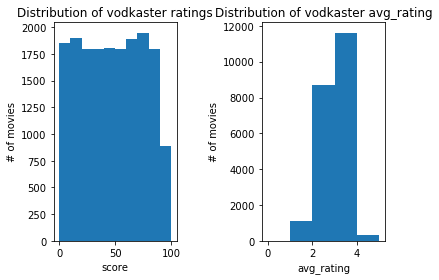

In [149]:
# Distrib des scores vodkaster
plt.subplot(1, 2, 1)
plt.hist(dff[dff["score"]>0].score,bins=[0, 10, 20, 30, 40, 50,60,70,80,90,100])
plt.xlabel("score")
plt.ylabel("# of movies")
plt.title("Distribution of vodkaster ratings")

# Distrib des avg_ratings (1-5)
plt.subplot(1, 2, 2)
plt.hist(dff[dff["avg_rating"]>0].avg_rating,bins=[0,1,2,3,4,5])
plt.xlabel("avg_rating")
plt.ylabel("# of movies")
plt.title("Distribution of vodkaster avg_rating")

#On affiche
plt.tight_layout()
plt.show()


In [132]:
#Il semble que le score et le avg_rating ne soient pas liés
dff[dff["avg_rating"]>0].describe()

,left_object_id,node_id,version,has_en_poster,duration,synopsis_original,score,nb_mc,nb_rating,avg_rating,recommended_by,riplay_available,lowest_price
count,2.177300e+04,1.861400e+04,21773.000000,21773.000000,19859.000000,21773.000000,17469.000000,21733.000000,21773.000000,21773.000000,21770.000000,21773.000000,4827.000000
mean,4.847758e+05,1.265855e+07,2.057686,0.332614,6004.742132,0.000321,46.990211,24.646068,182.001699,2.994627,32.029949,0.443072,3.949484
std,4.722365e+05,7.641598e+06,1.879934,0.471160,1767.114632,0.017928,27.789148,55.436446,506.335568,0.552893,79.303694,0.496760,3.576709
min,1.275000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.830000,0.000000,0.000000,1.990000
25%,7.641300e+04,6.263100e+04,1.000000,0.000000,5400.000000,0.000000,23.000000,3.000000,10.000000,2.650000,2.000000,0.000000,1.990000
50%,2.691120e+05,1.696750e+07,2.000000,0.000000,5940.000000,0.000000,47.000000,6.000000,28.000000,3.050000,6.000000,0.000000,2.990000
75%,8.554020e+05,1.745167e+07,3.000000,1.000000,6660.000000,0.000000,71.000000,20.000000,111.000000,3.390000,22.000000,1.000000,4.390000
max,1.355323e+06,1.818401e+07,63.000000,1.000000,60000.000000,1.000000,99.000000,1058.000000,8035.000000,4.410000,854.000000,1.000000,79.990000


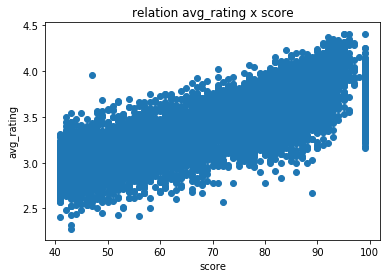

correlation = 0.7937336599161989


In [147]:
#testons la corrélation et un scatterplot
threshold = 40
plt.scatter(dff[dff["score"]>threshold].score, dff[dff["score"]>threshold].avg_rating)
plt.xlabel("score")
plt.ylabel("avg_rating")
plt.title("relation avg_rating x score")
plt.show()
#correlation
print("correlation = {}".format(dff[dff["score"]>threshold].score.corr(dff[dff["score"]>threshold].avg_rating)))